# 영상 데이터 예측 by 전이학습 template

고양이 코 분류

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


## 데이터 준비

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip

--2021-12-27 04:04:12--  https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip [following]
--2021-12-27 04:04:12--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81178786 (77M) [application/zip]
Saving to: ‘cat_face_keypoint.zip’

cat_face_keypoint.z 100%[===================>]  77.42M   355MB/s    in 0.2s    

2021-12-27 04:04:12 (355 MB/s) - ‘cat_face_keypoint.zip’ saved [81178786/81

In [ ]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [ ]:
print(x.shape)
print(y.shape)

(300, 224, 224, 3)
(300, 18)


## 이미지 보기

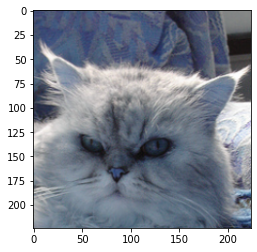

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [ ]:
plt.imshow(x[0])
plt.show()
print(y[0])

In [ ]:
# Left 눈 : 59, 135
# 코 : 85, 177
# kaggel에서 사진에서 point를 사전에 잡아준 데이터

### 키 포인트 확인

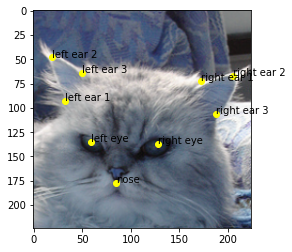

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()
# x, y index에 어떤 point인지 한번 더 확인
# point 기관 명은 추후에 입력

### 코 포인트 추리기

In [ ]:
y = y[:,4:6]
# 확인한 코 index로 다시 슬라이싱

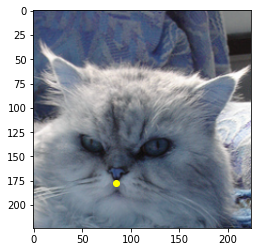

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## 데이터 전처리 및 학습

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)
# 8:2 로 분리
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                           

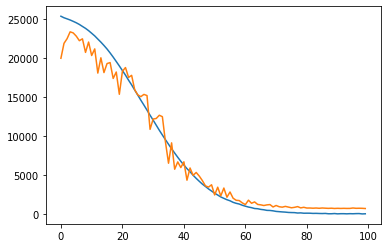

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse')


history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 결과보기

In [ ]:
predicted = model.predict(test_x[:16])

In [ ]:
print(predicted)

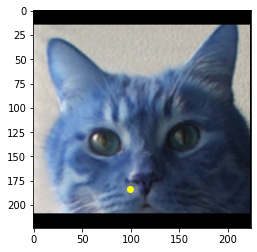

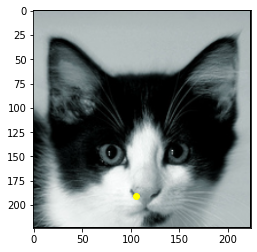

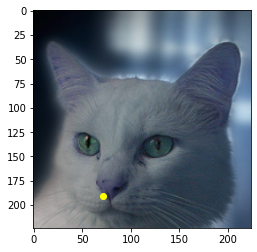

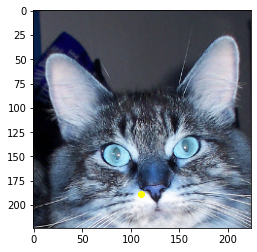

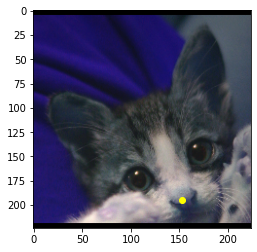

In [ ]:
for i in range(5):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

# 심화 실습

## 고양이 오른쪽 눈 위치 예측하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [ ]:
print(x.shape)
print(y.shape)

(300, 224, 224, 3)
(300, 18)


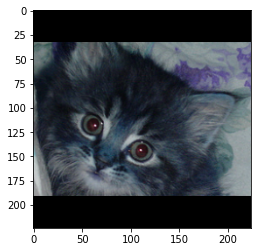

[ 61 117 111 144  67 161  19  50  45   0  88  37 161  78 205  88 178 139]


In [ ]:
plt.imshow(x[1])
plt.show()
print(y[1])

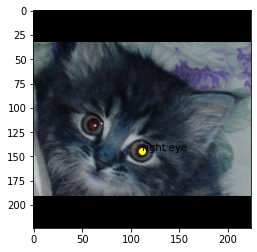

In [ ]:
target_x = x[1]
target_y = y[1]

plt.imshow(target_x)

# 위에서 확인한 오른쪽 눈 index 좌표는 [2:4]
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')


plt.show()

In [ ]:
y = y[:,2:4]
target_x = x[0]
target_y = y[0]

x = x / 255.

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
# 슬라이싱과 split 확인

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


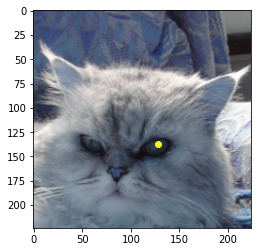

In [ ]:
plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               8028288   
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 10,287,042
Trainable params: 8,028,802
N

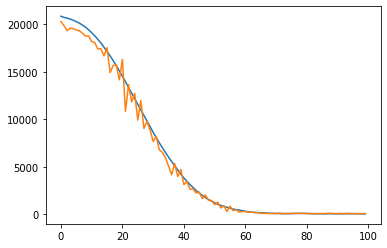

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

righteye_model = models.Sequential()

righteye_model.add(conv_layers)
righteye_model.add(Flatten())
righteye_model.add(Dense(128, activation='relu'))
righteye_model.add(BatchNormalization())
righteye_model.add(Dense(2))

righteye_model.summary()

righteye_model.compile(optimizer='Adam', loss='mse')


history = righteye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


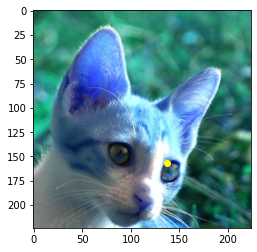

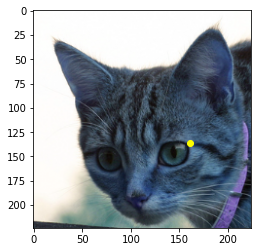

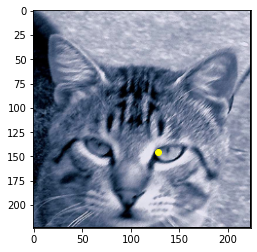

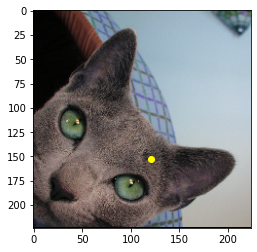

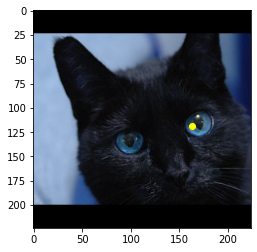

In [ ]:
predicted = righteye_model.predict(test_x[:5])

for i in range(5):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

## 고양이 오른쪽 눈(normalization)

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

In [ ]:
y = raw_y[:,2:4]

In [ ]:
x = raw_x / 255.
y= y / 255.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_9 (Flatten)         (None, 62720)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               8028288   
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 2)                 258       
                                                                 
Total params: 10,287,042
Trainable params: 8,028,802
N

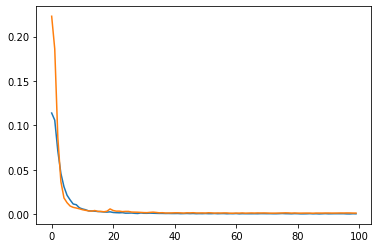

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(2, activation='sigmoid'))  #<--- output activation이 중요하다.
# 오른눈 포인트 위치가 확실히 정밀해졌다.

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [ ]:
predicted = right_eye_model.predict(test_x[:5])

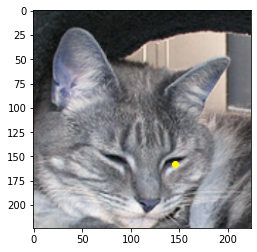

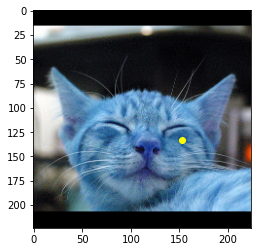

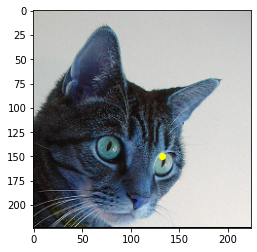

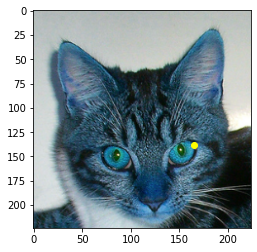

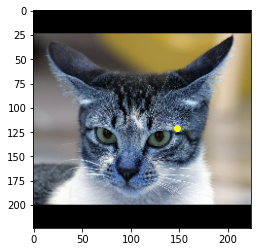

In [ ]:
for i in range(5):
  plt.imshow(test_x[i])
  plt.scatter((predicted[i][0]*255), predicted[i][1]*255, color='yellow')
  plt.show()

## 고양이 양쪽 눈 위치 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

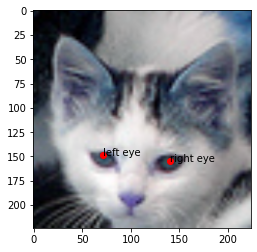

In [ ]:
target_x = x[2]
target_y = y[2]

plt.imshow(target_x)

# 위에서 확인한 오른쪽 눈 index 좌표는 [2:4]
# 위에서 확인한 왼쪽 눈 index 좌표는 [0:2]
plt.scatter(target_y[2], target_y[3], color='red')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[0], target_y[1], color='red')
plt.text(target_y[0], target_y[1], 'left eye')

plt.show()

In [ ]:
y = raw_y[:,0:4]

In [ ]:
x = raw_x / 255.
y= y / 255.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               8028288   
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 4)                 516       
                                                                 
Total params: 10,287,300
Trainable params: 8,029,060


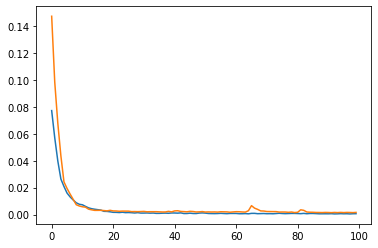

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

eyes_model = models.Sequential()

eyes_model.add(conv_layers)
eyes_model.add(Flatten())
eyes_model.add(Dense(128, activation='relu'))
eyes_model.add(BatchNormalization())
eyes_model.add(Dense(4, activation='sigmoid'))  #<-- output 갯수 변경

eyes_model.summary()

eyes_model.compile(optimizer='Adam', loss='mse')


history = eyes_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

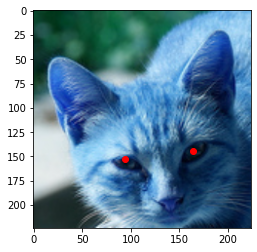

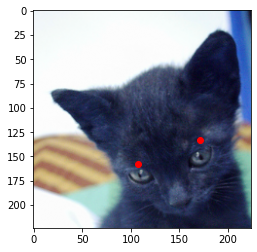

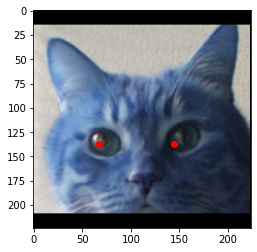

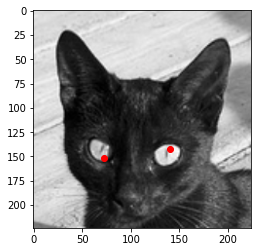

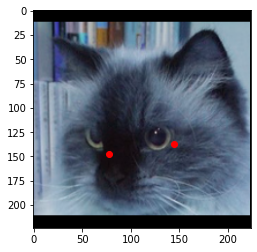

In [ ]:
predicted = eyes_model.predict(test_x[:5])

for i in range(5):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='red')
  plt.scatter(int(predicted[i][2]*255), int(predicted[i][3]*255), color='red')
  #<-- 찍어야 할 좌표 한개 더 추가
  plt.show()

여기서 내가 드는 생각은 train 데이터의 point들의 선형회귀를 통해서 값을 예측해 test set에서 예측하는 거잖아?? \
그럼 사실 눈을 예측하는게 아니지 않나?? \
내 지금 실력이 부족하지만 각 기관의 point 간의 거리간격 차이나 같은 식으로 독립변수를 둔다면 고개를 돌리는 사진도 좀 더 예측이 좋지 않을까?? \
왜냐하면 CT 나 X-Ray와 같은 영상 데이터는 찍는 방식과 부위가 일정하게 촬영하는 데이터라면 이게 더 좋을 수도 있지만 ???
\
\
예를 들면 눈간격, 귀와 눈 간격 \
혹은 얼굴 윤각과 얼굴 point들의 변수간의 예측을 통한 예측값 도출?? \
이렇게 하면 좋지 않을까??